In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 엑셀 파일을 불러옵니다
file_path = '23년서울시교통량_기온.xlsx'
data = pd.read_excel(file_path)

# 데이터프레임의 구조를 이해하기 위해 처음 몇 줄을 표시합니다
data.head()


,날짜,교통량,기온
0,2023-01-02,7487319,-4.5
1,2023-01-03,7861867,-5.0
2,2023-01-04,7935855,-1.8
3,2023-01-05,8078752,-1.6
4,2023-01-06,8158519,0.6


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 엑셀 파일을 불러옵니다
file_path = '23년서울시교통량_기온.xlsx'
data = pd.read_excel(file_path)

# 데이터프레임의 구조를 이해하기 위해 처음 몇 줄을 표시합니다
data.head()

# 회귀 분석을 위한 데이터 준비
X = data['기온']  # 예측 변수
y = data['교통량']  # 종속 변수

# 예측 변수에 상수를 추가
X = sm.add_constant(X)

# 선형 회귀 수행
# OLS(Ordinary Least Squares)는 선형 회귀를 위한 방법입니다.
# 이 방법은 관측된 값과 선형 모델에 의해 예측된 값 사이의 제곱 차이(잔차)의 합을 최소화합니다.
# 간단하고 널리 사용되는 회귀 분석 방법입니다.
model = sm.OLS(y, X).fit()

# 회귀의 요약
regression_summary = model.summary()
regression_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    교통량   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           8.49e-21
Time:                        16:35:31   Log-Likelihood:                -3511.9
No. Observations:                 247   AIC:                             7028.
Df Residuals:                     245   BIC:                             7035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.37e+06    3.9e+04    214.637      0.000    8.29e+06    8.45e+06
기온          2.263e+04   2203.967     10.266      0.000    1.83e+04     2.7e+04
==============================================================================
Omnibus:                       36.584   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.584
Skew:                          -0.756   Prob(JB):                     1.73e-16
Kurtosis:                       5.183   Cond. No.                         29.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
slope = model.params[1]
print("Slope of the regression line: ", slope)


Slope of the regression line:  22625.99234011444


/var/folders/r5/y4fhyf8d5dl2pqkg818hw37w0000gn/T/ipykernel_13569/671301698.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]


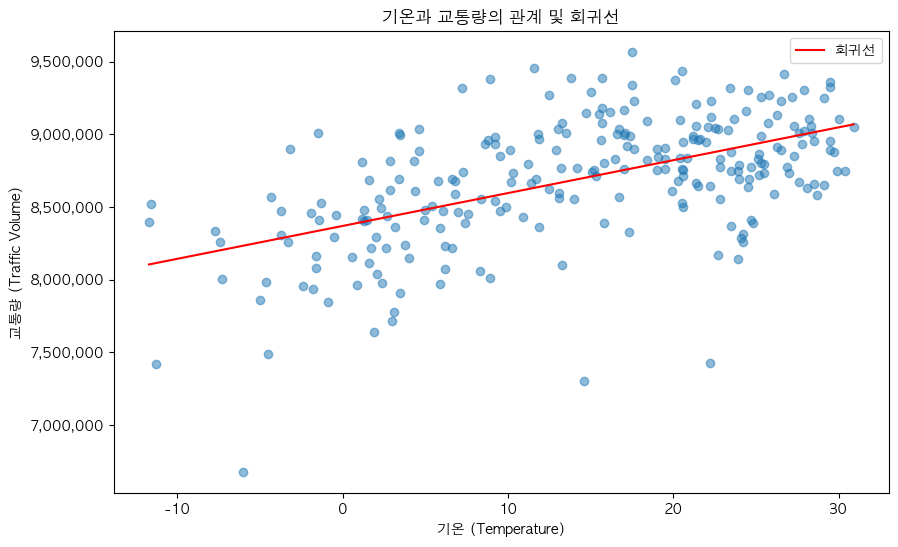

In [12]:
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='AppleGothic')

# 마이너스 기호가 올바르게 표시되도록 설정
plt.rcParams['axes.unicode_minus'] = False
# Adding thousand separator to the y-axis labels

# Scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(data['기온'], data['교통량'], alpha=0.5)

# Regression line
X = sm.add_constant(data['기온'])  # Adding a constant to the predictor variable
model = sm.OLS(data['교통량'], X).fit()  # Performing the linear regression
b0, b1 = model.params
x_values = np.array([data['기온'].min(), data['기온'].max()])
y_values = b0 + b1 * x_values
plt.plot(x_values, y_values, 'r', label='회귀선')

# Labels and title
plt.xlabel('기온 (Temperature)')
plt.ylabel('교통량 (Traffic Volume)')
plt.title('기온과 교통량의 관계 및 회귀선')
plt.legend()

# Adjusting y-axis to show full numbers with thousand separator
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Show the plot
plt.show()


